# Exploratory Data Analysis

In [1]:
#import relevent packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load datasets
data113 = pd.read_csv('data/data113.csv')
data114 = pd.read_csv('data/data114.csv')
data115 = pd.read_csv('data/data115.csv')

In [4]:
#merge datasets
data = pd.concat([data113, data114, data115])
print(data.shape)
data.head()

(18013, 38)


,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,subcommittee_codes_y,subcommittee_side,subcommittee_rank_in_party,id,gender,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,hr5893-113,hr5893,To restore the First Amendment Rights of Photo...,Ansel Adams Act,Rep.,S000937,Steve Stockman,R,2015-01-02,False,...,[],[],[],S000937,M,NaN,2,5.90,85.58,14.34
1,hr5892-113,hr5892,To protect cryptocurrencies.,Online Market Protection Act of 2014,Rep.,S000937,Steve Stockman,R,2015-01-02,False,...,[],[],[],S000937,M,NaN,2,5.90,85.58,14.34
2,hr5891-113,hr5891,To increase the standards of school lunch prog...,Michelle Obama Nutritional Act,Rep.,S000937,Steve Stockman,R,2015-01-02,False,...,[],[],[],S000937,M,NaN,2,5.90,85.58,14.34
3,hr5890-113,hr5890,To conduct a study to ensure that enhanced com...,No Missing Planes Act,Rep.,J000032,Sheila Jackson Lee,D,2015-01-02,False,...,[],[],[],J000032,F,NaN,20,7.48,93.85,6.06
4,hr5889-113,hr5889,"To revise the Uniform Crime Reports, and the N...",Justifiable Homicide Accuracy in Reporting Act...,Rep.,J000032,Sheila Jackson Lee,D,2015-01-02,False,...,[],[],[],J000032,F,NaN,20,7.48,93.85,6.06


We have just over 18,000 observations (bills) from the 113th, 114th, and 115th congresses. Each observation should have 38 features but several columns appear to be almost entirely empty

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18013 entries, 0 to 7393
Data columns (total 38 columns):
bill_id                       18013 non-null object
bill_slug                     18013 non-null object
title                         18013 non-null object
short_title                   18013 non-null object
sponsor_title                 18013 non-null object
sponsor_id                    18013 non-null object
sponsor_name                  18013 non-null object
sponsor_party                 18013 non-null object
introduced_date               18013 non-null object
active                        18013 non-null bool
last_vote                     876 non-null object
house_passage                 2112 non-null object
senate_passage                636 non-null object
enacted                       559 non-null object
vetoed                        2 non-null object
cosponsors                    18013 non-null int64
cosponsors_by_party           18013 non-null object
committee_codes_x     

We can see that of the 18,013 house bills introduced over these 3 congresses, only about 2,000 passed the house. Roughly 600 of those bills were also passed by the senate and 550 were enacted.

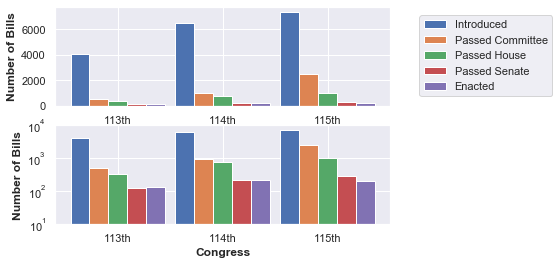

In [42]:
#We will now plot the number of bills which attain each stage of passage to get an idea of the strictness of the funnel
sns.set()
introduced = data[['bill_id', 'congress']].groupby(['congress']).count()
active = data[['active', 'congress']].groupby(['congress']).sum()
passed_house = data[['house_passage', 'congress']].groupby(['congress']).count()
passed_senate = data[['senate_passage', 'congress']].groupby(['congress']).count()
enacted = data[['enacted', 'congress']].groupby(['congress']).count()

#setting variable values
x = np.array([1,2,3])
i = introduced['bill_id']
j = active['active']
k = passed_house['house_passage']
l = passed_senate['senate_passage']
m = enacted['enacted']

#plotting and labeling
ax = plt.subplot(211)
w = 0.18
ax.bar(x-2*w, i, width=w, align='center', label = 'Introduced')
ax.bar(x-w, j, width=w, align='center', label = 'Passed Committee')
ax.bar(x, k, width=w, align='center', label = 'Passed House')
ax.bar(x+w, l, width=w, align='center', label = 'Passed Senate')
ax.bar(x+2*w, m, width=w, align='center', label = 'Enacted')

plt.xlabel('Congress', fontweight = 'bold')
plt.xticks(x, ['113th', '114th', '115th'])
plt.ylabel('Number of Bills', fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.5, .97))

ax1 = plt.subplot(212)
w = 0.18
ax1.bar(x-2*w, i, width=w, align='center', label = 'Introduced')
ax1.bar(x-w, j, width=w, align='center', label = 'Passed Committee')
ax1.bar(x, k, width=w, align='center', label = 'Passed House')
ax1.bar(x+w, l, width=w, align='center', label = 'Passed Senate')
ax1.bar(x+2*w, m, width=w, align='center', label = 'Enacted')

plt.xlabel('Congress', fontweight = 'bold')
plt.xticks(x, ['113th', '114th', '115th'])
plt.ylabel('Number of Bills', fontweight = 'bold')
plt.yscale('log')
plt.yticks([10,100,1000,10000])
plt.show()

The top graph above displays a linear scale and reveals the vanishingly small number of bills which are enacted each year compared to the thousands of bills introduced (note: this data is for house bills only). The second graph uses a logarithmic scale and shows that the number of bills which proceed to the next stage of passage appears to be roughly proportional to the number of bills in the proceeding stage. This suggests a possible poisson distribution where each bill is an instance which has some small chance of being passed.

Chi Squared Total:  245.0172493929171


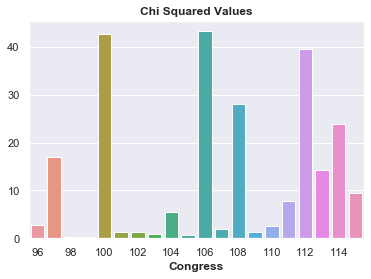

In [56]:
#We next test the goodness of fit for a poisson distribution. 
#From 1979 - 2018 (96th through 115th congress), 124,132 bills were introduced
#Over the same time period, 5,716 bills became law.
passage_rate = 5716/124132 # = 4.605% chance

#calculate observed and expected counts
introduced = [8455, 7457, 6442, 5743, 5585, 5977, 6212, 5310, 4344, 4874, 5681, 5767,
              5431, 6436, 7340, 6570, 6729, 5893, 6536, 7401]
introduced = np.array(introduced)
expected = passage_rate*introduced

enacted = [422, 267, 305, 256, 362, 294, 305, 259, 233, 237, 368, 288, 334, 316, 308, 254,
          199, 209, 216, 284]
observed = np.array(enacted)

#calculate and plot chi squared values
chi_squared = np.sum(((observed - expected)**2)/expected)
print('Chi Squared Total: ', chi_squared)
sns.barplot(x = np.arange(20), y= (observed - expected)**2/expected)
plt.xticks(np.arange(0,20,2), [congress for congress in range(96,116, 2)])
plt.xlabel('Congress', fontweight = 'bold')
plt.title('Chi Squared Values', fontweight = 'bold')
plt.show()

This Chi-Squared value suggests that the poisson distribution is not a good explanation for the number of bills passed each year. This is encouraging for our analysis as it suggests that there are variables which significantly inlfuence whether or not a bill will be passed and so it may be possible to find a relatively strong signal. Had the data followed a poisson distribution, we would have expected each bill to have roughly the same likelihood of passage regardless of other factors.

In [65]:
data['enacted'] = pd.to_datetime(data['enacted'])

In [66]:
data['introduced_date'] = pd.to_datetime(data['introduced_date'])

In [67]:
data['time_delta'] = data['enacted'] - data['introduced_date']

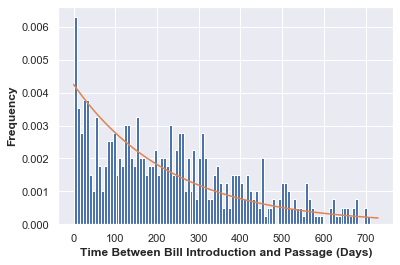

In [104]:
time_delta = (data.time_delta[data.time_delta.notna()] / np.timedelta64(1, 'D')).astype(int)
time_delta.hist(bins = 100, density = True)
x = np.linspace(0,730, 730)
plt.plot(x, (1/time_delta.mean())*np.exp(-(1/time_delta.mean())*x))
plt.xlabel('Time Between Bill Introduction and Passage (Days)', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.show()

We see that a bill has less chance of being passed the longer it has been since the bill's introduction. However, the dustribution is not well modeled by an exponential distribution. In fact, the distribution seems to follow a periodicdecay with frequent spikes.

In [109]:
#Insert the start date of the first legislative sesion for each congress
data['session_start_1'] = ''
data.loc[data.congress == 113, 'session_start_1'] = '2013-01-03'
data.loc[data.congress == 114, 'session_start_1'] = '2015-01-06'
data.loc[data.congress == 115, 'session_start_1'] = '2017-01-03'
data['session_start_1'] = pd.to_datetime(data['session_start_1'])
data['session_start_1'].unique()

array(['2013-01-03T00:00:00.000000000', '2015-01-06T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [110]:
#Insert the end date of the first legislative sesion for each congress
data['session_end_1'] = ''
data.loc[data.congress == 113, 'session_end_1'] = '2013-12-26'
data.loc[data.congress == 114, 'session_end_1'] = '2015-12-18'
data.loc[data.congress == 115, 'session_end_1'] = '2018-01-03'
data['session_end_1'] = pd.to_datetime(data['session_end_1'])
data['session_end_1'].unique()

array(['2013-12-26T00:00:00.000000000', '2015-12-18T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [111]:
#Insert the start date of the second legislative sesion for each congress
data['session_start_2'] = ''
data.loc[data.congress == 113, 'session_start_2'] = '2014-01-03'
data.loc[data.congress == 114, 'session_start_2'] = '2016-01-04'
data.loc[data.congress == 115, 'session_start_2'] = '2018-01-03'
data['session_start_2'] = pd.to_datetime(data['session_start_2'])
data['session_start_2'].unique()

array(['2014-01-03T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [112]:
#Insert the end date of the second legislative sesion for each congress
data['session_end_2'] = ''
data.loc[data.congress == 113, 'session_end_2'] = '2014-12-16'
data.loc[data.congress == 114, 'session_end_2'] = '2017-01-03'
data.loc[data.congress == 115, 'session_end_2'] = '2019-01-03'
data['session_end_2'] = pd.to_datetime(data['session_end_2'])
data['session_end_2'].unique()

array(['2014-12-16T00:00:00.000000000', '2017-01-03T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

Text(0, 0.5, 'Number of Bills')

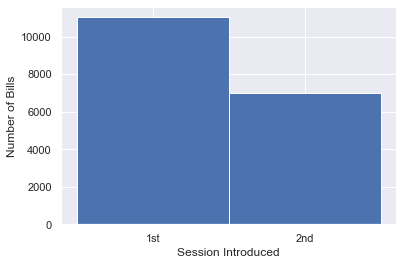

In [123]:
#Determine Which session each bill was introduced in
data['session_introduced'] = ''
session_1 = data['introduced_date'] <= data['session_end_1']
data.loc[session_1, 'session_introduced'] = 1

session_2 = (data['introduced_date'] > data['session_end_1'])
data.loc[session_2, 'session_introduced'] = 2
    
data['session_introduced'].hist(bins = 2)
plt.xlabel('Session Introduced')
plt.xticks([1.25,1.75], ['1st', '2nd'])
plt.ylabel('Number of Bills')

As we can see, about 50% more bills are introduced in the first session than in the second. We are now going to examine at what point in the session most bills are introduced, the fraction of bills which pass each session, and if any bills are passed after the end of one congress.

In [142]:
#When are most bills introduced in the session
data['introduced_frac'] = ''

frac_1 = ((data.introduced_date - data.session_start_1) / (data.session_end_1 - data.session_start_1))
frac_2 = ((data.introduced_date - data.session_start_2) / (data.session_end_2 - data.session_start_2))
session_1 = data['session_introduced'] == 1
session_2 = ~session_1

data.loc[data.session_introduced == 1, 'introduced_frac'] = frac_1[session_1]
data.loc[data.session_introduced == 2, 'introduced_frac'] = frac_2[session_2]

Text(0.5, 1.0, '2nd Session')

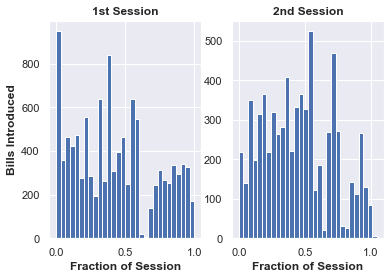

In [149]:
ax1 = plt.subplot(121)
data.loc[data.session_introduced == 1, 'introduced_frac'].hist(bins = 30)
plt.xlabel('Fraction of Session', fontweight = 'bold')
plt.ylabel('Bills Introduced', fontweight = 'bold')
plt.title('1st Session', fontweight = 'bold')

ax2 = plt.subplot(122)
data.loc[data.session_introduced == 2, 'introduced_frac'].hist(bins = 30)
plt.xlabel('Fraction of Session', fontweight = 'bold')
plt.title('2nd Session', fontweight = 'bold')


As we can see, most bills are introduced on the first day of the first session of congress. The number of bills introduced lowers as the end of the session approaches. The second session sees a spike in bills near the middle before tapering off as well. The overall lower frequency of bills during the second session may be explained by congresspeople focussing on their upcoming campaign while the spikes in each session are likely due congresspeople responding to constituents following a recess.

In [181]:
print('Overall Bills Enacted: ', data['enacted'].count())

session_1_enacted= data[data.session_introduced == 1]['enacted'].count()
session_1_introduced = data[data.session_introduced == 1]['bill_id'].count()
session_1_pct = 100* session_1_enacted / session_1_introduced
print('Bills Enacted from Session 1: ', session_1_enacted)
print('Percent Enacted from Session 1: %s%%' % np.round(session_1_pct, 2))

session_2_enacted = data[data.session_introduced == 2]['enacted'].count()
session_2_introduced = data[data.session_introduced == 2]['bill_id'].count()
session_2_pct = 100* session_2_enacted / session_2_introduced
print('Bills Enacted from Session 2: ', session_2_enacted)
print('Percent Enacted from Session 2: %s%%' % np.round(session_2_pct,2))


Overall Bills Enacted:  559
Bills Enacted from Session 1:  377
Percent Enacted from Session 1: 3.42%
Bills Enacted from Session 2:  182
Percent Enacted from Session 2: 2.61%


As we can see, there is about a 0.8% greater chance that a bill will pass during session 1 than session 2 of a congress. To confirm that this difference represents an actual shift in probability, we will conduct a quick bootstrapping test.

In [194]:
data['permutation'] = ''
observed_diff = session_1_pct - session_2_pct
trial_diffs = []
session_1s = []
session_2s = []
for i in range(10000):
    data['permutation'] = np.random.permutation(data.session_introduced)
    session_1_percent = 100* data[data.permutation == 1]['enacted'].count() / session_1_introduced
    session_2_percent = 100* data[data.permutation == 2]['enacted'].count() / session_2_introduced
    trial_diff = session_1_percent - session_2_percent
    trial_diffs.append(trial_diff)
    session_1s.append(session_1_percent)
    session_2s.append(session_2_percent)

16


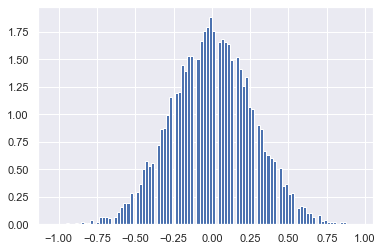

In [197]:
plt.hist(trial_diffs, bins = 100, density = True)
print(sum([i >= observed_diff for i in trial_diffs]))

The value of 16 above indicates that out of 10,000 random permutation trials, only 16 resulted in an a difference in percentage of bills enacted at least as great as what was observed. This suggests that, had the data come from a random distribution, meaning the session the bill was introduced has no influence on a bills enactment, we would expect to see our observed difference about 0.16% of the time. This leads us to believe that this is not a good explanation for the data and that the session in which the bill is introduced has some influence on whether a bill is enacted.

In [202]:
#lastly, we look to see if any bills are enacted after the end of the current congress
data['senate_passage'] = pd.to_datetime(data['senate_passage'])
data['house_passage'] = pd.to_datetime(data['house_passage'])
print('Number of Bills Enacted After the End of the Current Congress: ', data[data.enacted > data.session_end_2]['bill_id'].count())
print('Number of Bills Passed in Senate After the End of the Current Congress: ', data[data.senate_passage > data.session_end_2]['bill_id'].count())
print('Number of Bills Passed in House After the End of the Current Congress: ', data[data.house_passage > data.session_end_2]['bill_id'].count())


Number of Bills Enacted After the End of the Current Congress:  17
Number of Bills Passed in Senate After the End of the Current Congress:  0
Number of Bills Passed in House After the End of the Current Congress:  0


Therefore, we see that while a bill may be enacted after the end of the current congress (signed by the president during their last days in office), no bill which is not passed by the current congress is ever taken up and passed by the succeeding congress.

In [208]:
#Do a quick pairplot
data = data.drop(columns = ['permutation', 'permutaion'])

Due to the categorical nature of nearly all variables, there is no information to be gained from a correlation heatmap or pairplot at this time

In [209]:
data.to_csv('data/data.csv')